In [1]:
%load_ext autoreload

# ODE

## Ejercicio 1
$y'= -5y+5t^2+2t$
* $0 \le t \le 1$
* $y(t_0)=1/3$
* $N=10$



In [2]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
from src import ODE_euler
import numpy as np
import math

f= lambda t, y: -5*y+5*t**2+2*t

ys, ts, h= ODE_euler(a=0,b=1, f=f,y_t0= 1/3, N=10)

print(f"ys: {ys}")
print(f"ts: {ts}")
print(f"h: {h}")

ys: [0.3333333333333333, 0.16666666666666666, 0.10833333333333334, 0.11416666666666667, 0.16208333333333336, 0.2410416666666667, 0.34552083333333333, 0.4727604166666667, 0.6213802083333333, 0.7906901041666666, 0.9803450520833332]
ts: [0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]
h: 0.1


## Comparación con la solución real
La solución real de la ecuación diferencial es:
$y(t)=t^2 +1/3e^{-5t}$

* Grafique la solución real y la aproximación obtenida con el método de Euler en una misma gráfica.



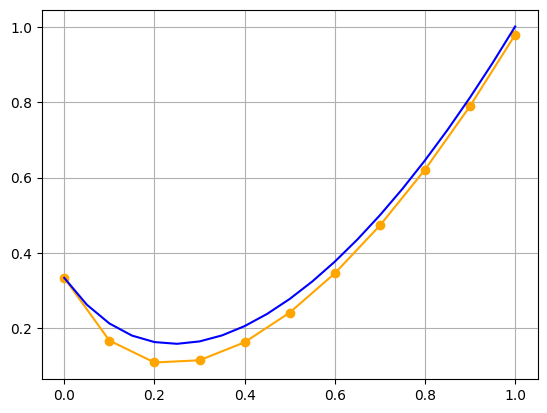

[0.33333333 0.26210026 0.21217689 0.17995552 0.16262648 0.1580016
 0.16437672 0.18042465 0.20511176 0.23763307 0.27736167 0.32380929
 0.37659569 0.43542474 0.50006579 0.57033925 0.64610521 0.72725474
 0.813703   0.9053839  1.00224598]


In [35]:
import matplotlib.pyplot as plt

def y_real(t):
    return (t)**2 + 1/3 * np.e**(-5*t)

t=np.linspace(0,1,21)
f_real = y_real(t)

def realxaprox(ts, ys):
    plt.plot(ts,ys, marker="o", linestyle="-", color="orange")
    plt.plot(t,f_real, linestyle="-", color="blue")
    plt.grid(True)
    plt.show()
    
realxaprox(ts,ys)

print(f_real)

# Errores
Calcule el eeror relativo para diferentes valores de N.

In [22]:
# Calcular error relativo
ys2, ts2, h2= ODE_euler(a=0,b=1, f=f,y_t0= 1/3, N=5)

print(f"ys, N=5: {ys2}")

ys3, ts3, h3= ODE_euler(a=0,b=1, f=f,y_t0= 1/3, N=20)

print(f"ys, N=5: {ys3}")

ys, N=5: [0.3333333333333333, 0.0, 0.12000000000000002, 0.32000000000000006, 0.6000000000000001, 0.9600000000000002]
ys, N=5: [0.3333333333333333, 0.25, 0.193125, 0.15734375, 0.1386328125, 0.133974609375, 0.14110595703125, 0.1583294677734375, 0.18437210083007813, 0.21827907562255858, 0.2593343067169189, 0.3070007300376892, 0.3608755475282669, 0.42065666064620016, 0.4861174954846501, 0.5570881216134876, 0.6334410912101158, 0.715080818407587, 0.8019356138056903, 0.8939517103542679, 0.9910887827657011]


In [26]:
def error(calculado, x_real, N):
    for xs, x in zip(calculado, x_real):
         relativo = (abs(calculado-x_real)/abs(x_real))
         # promedio = relativo / (N+1)
         return relativo, N+1

###############
# N=10

error_relativo, N= error(ys,f_real,10)

promedio = 0
for i in error_relativo:
    promedio += i

print(promedio/N)

0.12909541068138505


In [28]:
###############################
# N=5

error_relativo, N= error(ys2,f_real,5)

promedio = 0
for i in error_relativo:
    promedio += i

print(promedio/N)

0.2797909081673575


In [31]:
###############################
# N=20

error_relativo, N= error(ys3,f_real,20)

promedio = 0
for i in error_relativo:
    promedio += i

print(promedio/N)

0.06314569684056266
